In [1]:
from astropy.coordinates import (SkyCoord, BarycentricTrueEcliptic, GCRS)
from astropy.time import Time
import astropy.units as u
from astropy.coordinates import get_body_barycentric, get_body
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# set some times
mjd = np.arange(500) + 60980.0
times = Time(mjd, format="mjd")

In [3]:
# Let's loot at the position of the sun as seen from earth
sun_body = get_body_barycentric("sun", times)
# convert to a SkyCoord
sun_sc = SkyCoord(sun_body, representation_type='cartesian', obstime=times, frame=BarycentricTrueEcliptic)

Text(0.5, 1.0, 'sun, min=0.982911 AU, max=1.017032 AU')

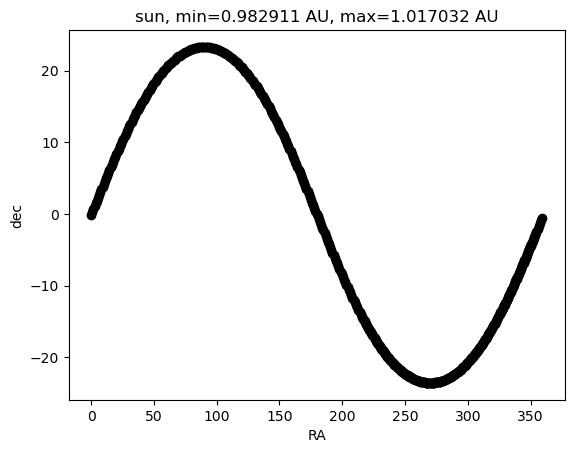

In [4]:
# transform to as seen from Earth. The sun should travel along the ecliptic.
sun_gc = sun_sc.transform_to(GCRS)
plt.plot(sun_gc.ra, sun_gc.dec, 'ko')
plt.xlabel("RA")
plt.ylabel("dec")
plt.title("sun, min=%f AU, max=%f AU" % (sun_gc.distance.au.min(), sun_gc.distance.au.max()))

Text(0.5, 1.0, 'earth, min=0.002193 AU, max=0.415013 AU')

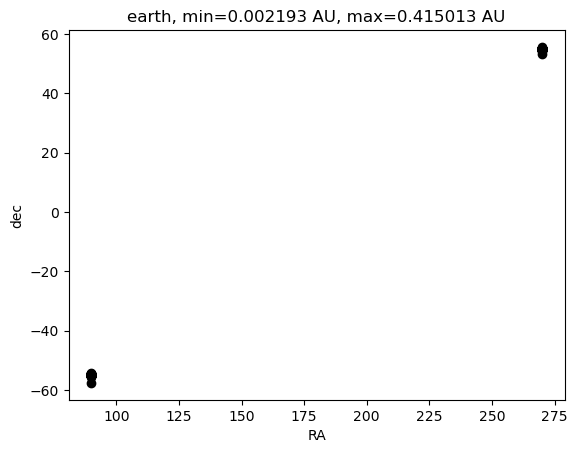

In [5]:
# do the same thing with earth
# Let's loot at the position of the sun as seen from earth
earth_body = get_body_barycentric("earth", times)
# convert to a SkyCoord
earth_sc = SkyCoord(earth_body, representation_type='cartesian', obstime=times, frame=BarycentricTrueEcliptic)

# transform to as seen from Earth
earth_gc = earth_sc.transform_to(GCRS)
plt.plot(earth_gc.ra, earth_gc.dec, 'ko')
plt.xlabel("RA")
plt.ylabel("dec")
plt.title("earth, min=%f AU, max=%f AU" % (earth_gc.distance.au.min(), earth_gc.distance.au.max()))

Text(0, 0.5, 'Distance of earth to earth (AU)')

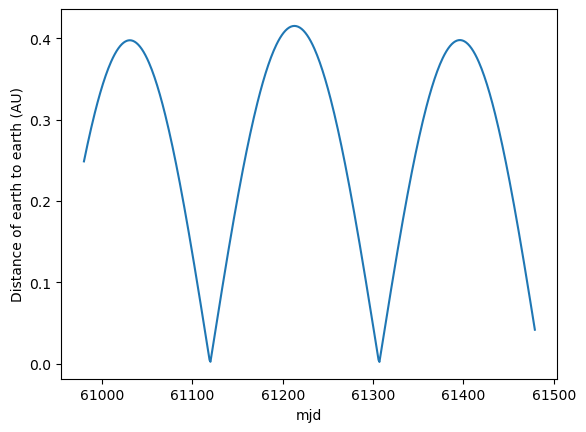

In [6]:
plt.plot(times.mjd, earth_gc.distance.au)
plt.xlabel("mjd")
plt.ylabel("Distance of earth to earth (AU)")

In [7]:
# Why is the earth 0.4 AU away from the earth?